In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero. From:
    http://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''

    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)
    
    if start < midpoint < stop:
        # shifted index to match the data
        shift_index = np.hstack([
            np.linspace(0.0, midpoint, 128, endpoint=False),
            np.linspace(midpoint, 1.0, 129, endpoint=True)
        ])
    elif midpoint >=stop:
        shift_index = np.hstack([
            np.linspace(0.0, midpoint, 128, endpoint=False),
            np.linspace(midpoint, midpoint, 129, endpoint=True)])
    
    elif midpoint <=start:
        shift_index = np.linspace(midpoint, stop, 257)
    else:
        pass

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

0.0 1.0 1.0


<matplotlib.colorbar.Colorbar instance at 0x0000000019A4D8C8>

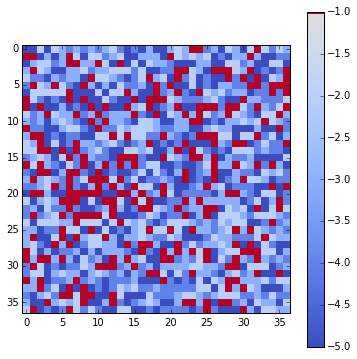

In [99]:
low, high = -5.0, -1.0 #-20, 2
biased_data = np.random.random_integers(low=low, high=high, size=(37,37))
start, midpoint, stop = 0, .5, 1.0


start, stop = 0.0, 1.0
#if high > 0 and low < 0:
crange = high - low
if high > 0 and low > 0:
    midpoint = 0.0
elif high < 0 and low < 0:
    midpoint = 1.0
    stop = 1.0
elif abs(low) > high:
    shrunken_extent = crange/(2 * abs(low))
    relative_midpoint = abs(low) / crange
    start = 0.0
    stop = (high-low) / (2 * abs(low))
    #midpoint = stop * low/(high-low)
    midpoint = start + abs(low) / (2*abs(low))#shrunken_extent * relative_midpoint
elif abs(low) < high:
    shrunken_extent = crange/(2 * high)
    relative_midpoint = abs(low) / crange
    start = (high - abs(low)) / (2 * high)
    stop = 1.0
    #midpoint = start + abs(low) / crange
    midpoint = start + abs(low)/(2* high) #shrunken_extent * relative_midpoint


else:
    pass
        
print start, midpoint, stop
orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.75, name='shifted')
shrunk_cmap = shiftedColorMap(orig_cmap, start=start, midpoint=midpoint, stop=stop, name='shrunk')

fig = plt.figure(figsize=(6,6))
plt.imshow(biased_data, interpolation="none", cmap=shrunk_cmap)
plt.colorbar()

In [93]:
np.linspace(start, stop, 257)

array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
        0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
        0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
        0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
        0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
        0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
        0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
        0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
        0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
        0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
        0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
        0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
        0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
        0.25390625,  0.2578125 ,  0.26171875,  0.265625  ,  0.26

##### 0.8325 * .75

In [62]:
shrunken_extent

0.6666666666666666